# Project (Option 1) - Settlers of Catan 

#### Authors:

v1.0 (2016 Spring) David Marn, Ashvin Nair, Kabir Chandrasekher, Tony Duan, Kangwook Lee, Kannan Ramchandran

v1.1 (2017 Spring) Tavor Baharav, Kabir Chandrasekhar, Sinho Chewi, Andrew Liu, Kamil Nar, David Wang, and Kannan Ramchandran

v1.2 (2018 Spring) Tavor Baharav, Kaylee Burns, Gary Cheng, Sinho Chewi, Hemang Jangle, William Gan, Alvin Kao, Chen Meng, Vrettos Muolos, Kanaad Parvate, Ray Ramamurti, and Kannan Ramchandran

v1.3 (2018 Fall) Justin Hong, Eric Liu, Katie Kang, Ray Ramamurti, Raghav Anand, Kurtland Chua, Payam Delgosha, William Gan, Avishek Ghosh, Nikunj Jain, Adarsh Karnati, Kanaad Parvate, Amay Saxena, Kannan Ramchandran, Abhay Parekh

v1.4 (2019 Spring) Justin Hong, Eric Liu, Katie Kang, Ray Ramamurti, Raghav Anand, Kurtland Chua, William Gan, Amay Saxena, Hemang Jangle, Gary Cheng, Alvin Kao, Ilian Herzi, Kannan Ramchandran

## Introduction
The goal of the game is to get $10$ victory points as fast as possible. To get these points, the player must choose a wise trade-off between spending resources to potentially obtain points and upgrading their modes of production. You, the chieftain of the island, must decide where and when to build additional <font color=purple>settlements</font> on the island to boost your resource production, with roads to connect them. Alternatively, you can invest into development cards, which will bring you a victory point, or upgrade a settlement into a <font color=blue>city</font> which doubles production and gives you another victory point. A settlement / city must border on a resource field in order to harvest its resources. We will have three different terrains: forests, which produce <font color=brown>wood</font>, hills which produce <font color=red>brick</font>, and fields of <font color=gray>grain</font> (grain). Additionally we have <font color=khaki>desert</font> which provide no resources. Every turn, we roll two dice and record the sum $X$. The settlements that are next to the tile that is labelled with $X$ get one resource from that field, and we keep collecting resources and building up to 10 victory points.

## Game layout

Our modified Catan board is drawn below.

Tiles are color coded with the resource they produce: <font color=brown>wood</font>, <font color=red>brick</font>, <font color=green>grain</font>. (and <font color=khaki>desert</font>)

You build <font color=purple>settlements</font> and <font color=blue>cities</font> on vertices of the board. The small purple square is a settlement, labeled "1" because it gives you one resource of the surrounding tiles when the corresponding number is rolled. The small blue square is a city and gives you 2 resources from surrounding tiles.

These settlements and cities must be connected by roads (white).

In [1]:
import numpy as np
from catan import Catan, CatanException, get_random_dice_arrangement, Player, Game, simulate_1p_game, simulate_1p_game_with_data
import matplotlib.pyplot as plt
from itertools import repeat
%matplotlib inline

Drawing...


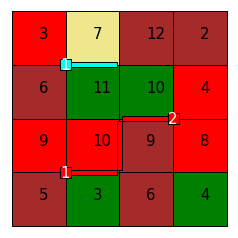

In [2]:
width, height = 4,4
dice = get_random_dice_arrangement(width, height)
resources = np.random.randint(0, 3, (height, width))
board = Catan(dice, resources, {6:0, 16:1}, {13:0}, {(6, 7):0, (7, 12):0, (12, 13):0, (16,17): 1})a
board.register_player()
board.register_player()
board.draw()


## Rules
When implementing your Catan strategy, remember to follow these rules:
<ul>
<li> Every turn you roll 2 dice, call the sum X </li>
<li> Find tiles labeled with the number X and collect one of that resource for every settlement and two of that resource for every city on a vertex of that tile (this logic is implemented for you already) </li>
<li> If a 7 is rolled, the player must dump resources until their total resource count is below the max resource limit. </li>
<!---<li> You can never have more than 6 of any resource: if you get extra, you just keep 6 </li>--->
<li> You can trade 4 resources of the same kind for a resource of your choice (i.e. 4 grain for 1 wood) </li>
<li> If you have a settlement or a city built on one of the 4 ports (4 corners), you can trade at a discount <ul>
<li> Bottom left hand corner: wood port, trade 2 wood for 1 of any other resource </li>
<li> Bottom right hand corner: brick port, trade 2 brick for 1 of any other resource </li>
<li> Upper left hand corner: grain port, trade 2 grain for 1 of any other resource </li>
<li> Upper right hand corner: general port, trade 3 of any resource for 1 of any other resource </li>
</ul></li>
<li>Settlements must be connected by roads </li>
<li>Roads must be connected to settlements / cities or other roads </li>
<li>Settlements cannot be built adjacent to other settlements or cities </li>
<li> You can build by paying resources according to the costs below, and building any non-road item (including buying a development card) gives you 1 victory point </li>
<li> You start the game off with 3 of each resource and no buildings </li>
<li> You may make as many purchases as you want per turn </li>
<li> You are alloted 3 minutes of computation time per 100 games over a fixed board. </li>
    <ul> <li> You are free to divide this time between planBoard and realtime computation as you wish
        </li> </ul>
</ul>

## Costs
You can build settlements or cities, which boost your production and gain you a victory point, buy roads to enable new settlement buying, or buy development cards which brings you an additional victory point.

The costs are given below, and stored in the array costs for convenience.

In [3]:
import pandas as pd

costs = np.array([[2, 1, 1],
                  [1, 2, 2],
                  [0, 3, 3],
                  [1, 1, 0]])

resources = ['wood', 'brick', 'grain']
buildings = ['settlement', 'card', 'city', 'road']
df = pd.DataFrame(costs, index=buildings, columns=resources)
html = df.to_html()
from IPython.core.display import HTML
HTML(html)

,wood,brick,grain
settlement,2,1,1
card,1,2,2
city,0,3,3
road,1,1,0


The Catan board is implemented for you, with utilities to draw and get a table of resources gained. Feel free to skip this for now, play with the demo below, then come back up to reread the details of the implementation.

 
Here's a short API of the classes and methods implemented in catan.py (which you're encouraged to check out):

#### BOARD CLASS

To initialize a board: 
`board = Catan(dice, resources, settlements, cities)`

The constructor initializes our Catan board. Dice and resources must be the same shape: HxW where H is the height of the board and W is the width. dice[i,j] is the dice number that tile corresponds to (each element between 2-12 inclusive) and resources[i,j] is the resource that tile  provides. Settlements is a dictionary mapping vertices with settlements on them to player ids, and likewise for cities.

`board.clear_board()`
clears the board for a new game.

`board.register_player()`
registers a player to play on this board.

`board.build(x,y,building,player_id)`
takes in two coordinates, x and y, a building type ("city"/"settlement"), and a player_id and builds that player's building at the specified location. If the building cannot be built at that location, an exception is thrown.

`board.build_road(c0,c1,player_id)`
takes in two vertex location tuples (x0,y0) and (x1,y1), and a player_id and builds a road between the two vertices. If the road cannot be built at that location, an exception is thrown.

`board.if_can_build(building,x,y,player_id)`
returns False if a building cannot be built at that vertex for that player. Otherwise, it returns True.

`board.if_can_build_road(v1,v2,player_id)`
returns False if a road cannot be built between vertices v1 and v2 for that player. Otherwise, it returns true.

`board.is_port(vertex)`
returns True if vertex is located on a port, False otherwise.

`board.which_port(v)`
returns which port vertex v corresponds to (0 : wood port, 1 : brick port, 2 : grain port, 3 : general port).

`board.get_resources(player_id)`
returns a 11x3 numpy array of resources gained for each possible dice sum for the given player. That is, r[i, :] = resources gained from throwing a (i+2).

`board.draw()`
draws the board.


#### PLAYER CLASS

`player = Player(player_name,action,dumpPolicy,resources,points=0,turn_counter=0)`
Where player_name is a string, an action is a function, dumpPolicy is a function, resources is an array, points and turn_counter are integers used for debugging.

`player.join_board(board)`
takes in a board instance and registers the player to this board, and reinitializes the player instance variables to the default initialization.

`player.get_settlements()`
`player.get_cities()`
`player.get_roads)`
gets a list of the players respective pieces from the board the player is registered with.

`player.if_can_buy(item)` 
returns True if the player can afford item ("card"/"settlement"/"city") and False otherwise

`player.buy(item)` 
actually buys the item and throws a CatanException if that is not possible. Note that you need to specify the location of an item with the optional arguments `x`,`y` if you are buying a city, settlement, or road.

`player.trade(r_in,r_out)`
Trades resource r_in for r_out with ratio 4:1, unless player owns a port allowing for better trades. Throws an exception if player does not have the required amount of resource r_in to complete the trade.


#### TESTING

To initialize a game:
`game = Game(board, players)` where board is a `Catan` instance and players are a list of `Player` instances.

`game.play_round()` 
plays one round of Catan: rolls the dice, collects the resources and calls the function action() for each player once.

`game.check_win()`
checks if a player has one and if so, returns the player's name and the number of turns played. If not, returns false.

`game.run_game_to_completion()`
runs a single game and returns the winner's name and the number of turns the winner took to win.

`game.restart_game()`
restarts the players and the game board for a new game.

`game.simulate_game(num_trials)`
simulates $num\_trials$ games and returns a dictionary mapping player names to their $[average\_turns, win\_rate]$.

`game.simulate_one_game_with_data()`
simulates one game and returns a list of settlements, cities, roads, hands, live_points, and dice_rolls at each turn.

`simulate_1p_game(action, dumpPolicy, planBoard, board, num_trials)`
Simulates $num\_trials$ games on $board$, with the precompute method $planBoard$ to be used beforehand, and the $action$ and $dumpPolicy$ methods for a one player game. Returns the average turns taken to win.

`simulate_1p_game_with_data(action, dumpPolicy, planBoard, board)`
simulates a one player game with the respective methods and board, returning a list of settlements, cities, roads, hands, live_points, and dice_rolls.


##  <font color=blue>$\mathcal{Q}$1. Learning the Game</font>

Drawing...
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 2. 0.]
 [1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 2. 0.]
 [2. 1. 0.]
 [0. 1. 2.]
 [0. 0. 0.]
 [0. 0. 0.]]


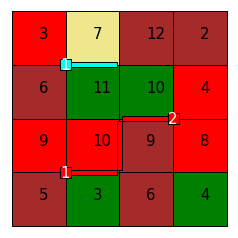

In [4]:
board.draw()
print(board.get_resources())

# wood is brown, brick is red, grain is green 
# below is the resource outcome of a dice roll 2-12

## Game Simulation

Run the code below to see a game in action! This will use our (bad) sample policy.

In [5]:
# sample action function: takes in the "Player"
def action(self):
    # inputs:
    # resources - an array of resources
    # costs - an array of costs, 0 - settlement, 1 - card, 2 - city
    # basic strategy: Once we get 4 of one resource, we make a trade. 
    # Then we try to buy development cards
    if self.get_settlements() == []:
        (x,y) = self.preComp #use the optimal settlement location  
        self.buy("settlement", x, y) # we determined previously
    elif self.if_can_buy("card"):
        self.buy("card")
    elif self.resources[np.argmax(self.resources)] >= 4:
        rmax, rmin = np.argmax(self.resources), np.argmin(self.resources)
        self.trade(rmax,rmin)
    return

# sample dump policy function: takes in the "Player" and ROBBER_MAX_RESOURCES
# and returns a resource array which indicates the number of each resource to dump.
# self.resources - dumpPolicy(self, max_resources) must sum up to less than or equal ROBBER_MAX_RESOURCES
def dumpPolicy(self, max_resources):
    new_resources = np.minimum(self.resources, max_resources // 3)
    return self.resources - new_resources

def planBoard(baseBoard):
    # prefer middle of the board over edges
    x = np.random.randint(1, baseBoard.width)
    y = np.random.randint(1, baseBoard.height)
    optSettlementLoc = (x,y)
    return optSettlementLoc
    
num_trials = 100

width, height = 4, 4
dice = get_random_dice_arrangement(width, height)
resources = np.random.randint(0, 3, (height, width))
board = Catan(dice, resources)
print("average turns to win: {}".format(simulate_1p_game(action, dumpPolicy, planBoard, board, num_trials)))

average turns to win: 445.51


In [6]:
settlements, cities, roads, hands, live_points, dice_rolls = simulate_1p_game_with_data(action, dumpPolicy, planBoard, board)

def draw(t):
    t = int(t)
    live_board = Catan(board.dice, board.resources, [], [])
    live_board.settlements = settlements[t]
    live_board.cities = cities[t]
    live_board.roads = roads[t]
    print("turn:", t)
    print("points:", live_points[t])
    print("dice roll:", dice_rolls[t])
    print("resources:", hands[t])
    live_board.draw()

In [7]:
#If this cell doesn't work, run the two commands below in terminal
# pip install ipywidgets
# jupyter nbextension enable --py --sys-prefix widgetsnbextension

from ipywidgets import *
interact(draw, t=(0, len(live_points) - 1, 1))

interactive(children=(IntSlider(value=132, description='t', max=265), Output()), _dom_classes=('widget-interact',))

<function __main__.draw>

You are responsible for designing a good action / planning policy. Keep in mind that you are only allowed to modify these two methods, and that your action / planBoard / dumpPolicy functions must operate within a time constraint (under 3 minutes for 100 trials on a fixed board).

Your bot will be tested on 10 random boards (same random seed for all students) for 100 runs each. We will also be testing on several purposefully adversarial boards to see how your bots run against more difficult maps.

## Competition
As you may have noticed, the Board, Player, and Game classes are also designed for multiplayer games. We would like you to design player functions optimized against $n$ other players on the game board. Do your best to outcompete our staff `Player` class which will be released later on. An example of how to play games against different players is provided below. In our example, we play our (bad) sample policy against itself.

Your multiplayer bot will also be tested against our staff bot as a baseline in 10 random boards, with 100 runs each. In addition, we will be running a round robin tournament of all the submissions against each other, with the top teams earning a little extra credit.

In [8]:
# Initialize board
dice = get_random_dice_arrangement(width, height)
resources = np.random.randint(0, 3, (height, width))
board = Catan(dice, resources)

# Initialize players
player1 = Player("Player 1", action, dumpPolicy, planBoard)
player2 = Player("Player 2", action, dumpPolicy, planBoard)

# Initialize game
game = Game(board, [player1, player2])

# Simulate game and report results
results = game.simulate_game(num_trials)
for r in results:
    print("{} has a win rate of {}, with average {} turns per won game".format(r, results[r][1], round(results[r][0], 2)))

Player 1 has a win rate of 0.57, with average 343.63 turns per won game
Player 2 has a win rate of 0.43, with average 367.3 turns per won game


##  <font color=blue> Efficient Optimization [OPTIONAL]
### <font color=blue> This is just one suggestion of how to proceed. The important thing is to separate the adversarial real world game of Catan from this simulation, and to think in a stochastic optimization mindset. </font>

In the final phase of the project, use the tools you wrote above to figure out the best action sequence to minimize the time until you reach 10 points. To make our calculations tractable we can compute something a little different than finding the optimum action over all actions and all possible game states. Instead, we can reduce the goal at any given moment to building the _next_ objective. In this framework, we need to minimize the expected time from having no resources to building each objective. The below questions are optional but we recommend at least looking over them to see the topics we cover in class from a computing point of view.

### <font color=blue> 1. Create a function `get_transition_matrix` which returns the transition matrix of your Markov chain. </font>

In [ ]:
def transition_matrix(board):
    """returns matrix T[i, j] = P(transition from state i to state j)"""
    ### Fill in your solution here`````````````````````````````````````````````
    return np.zeros((2,2))

T = transition_matrix(board)
print(T)

##  <font color=blue> Calculating Hitting Time</font>

Let's start by building a useful function to answer the question: given a board layout and starting resources, how long will it take until you can afford a specific building?

Hint: one method would be to create another Markov chain/transition matrix where the hitting time between two of the states gives the time until you can afford a building.

### <font color=blue> 2a. Write a function to calculate mean hitting time from 0 resources until you can afford a building.

In [ ]:
def hitting_time(board, building):
    ### your code here
    return [42]
    
h = hitting_time(board, 1) # calculates time until we can afford a VP card
print(h)

### <font color=blue> 2b. Simulate the Markov process and record the expected hitting time to states to check the accuracy of your hitting time function. </font>

In [ ]:
# simulator goes here


Now you can minimize total expected hitting time with your policy using your hitting time function to speed up the optimization instead of simulating everything.